In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

!pip install geopandas plotly_express


In [2]:

# Load the data into DataFrames
athletes_df = pd.read_csv(r'/content/medallists.csv')
country_df = pd.read_csv(r'/content/medals_total.csv')
medals_df = pd.read_csv(r'/content/medals.csv')
medallist_df = pd.read_csv(r'/content/medallists.csv')

In [3]:
medallist_df.sample(10)

,medal_date,medal_type,medal_code,name,gender,country,country_code,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code
834,2024-08-01,Silver Medal,2,GEMMELL Erin,Female,United States,USA,United States,United States of America,W,Swimming,Women's 4 x 200m Freestyle Relay,TEAM,/en/paris-2024/results/swimming/women-s-4-x-20...,2004-12-02,1935907
395,2024-08-05,Bronze Medal,3,WANG Xinjie,Male,China,CHN,China,NaN,NaN,Shooting,25m Rapid Fire Pistol Men,ATH,/en/paris-2024/results/shooting/25m-rapid-fire...,1996-10-24,1913919
316,2024-08-04,Bronze Medal,3,KERLEY Fred,Male,United States,USA,United States,NaN,NaN,Athletics,Men's 100m,ATH,/en/paris-2024/results/athletics/men-s-100m/fn...,1995-05-07,1960958
1284,2024-08-07,Silver Medal,2,TANFIELD Charlie,Male,Great Britain,GBR,Great Britain,Great Britain,M,Cycling Track,Men's Team Pursuit,TEAM,/en/paris-2024/results/cycling-track/men-s-tea...,1996-11-17,1912560
319,2024-08-04,Bronze Medal,3,KOKHAN Mykhaylo,Male,Ukraine,UKR,Ukraine,NaN,NaN,Athletics,Men's Hammer Throw,ATH,/en/paris-2024/results/athletics/men-s-hammer-...,2001-01-22,1571563
190,2024-08-01,Bronze Medal,3,MA Zhenzhao,Female,China,CHN,China,NaN,NaN,Judo,Women -78 kg,HATH,/en/paris-2024/results/judo/women--78-kg/repf0...,1998-04-24,1891067
386,2024-08-05,Silver Medal,2,HE Bing Jiao,Female,China,CHN,China,NaN,NaN,Badminton,Women's Singles,HATH,/en/paris-2024/results/badminton/women-s-singl...,1997-03-21,1913436
610,2024-07-29,Gold Medal,1,OKA Shinnosuke,Male,Japan,JPN,Japan,Japan,M,Artistic Gymnastics,Men's Team,TEAM,/en/paris-2024/results/artistic-gymnastics/men...,2003-10-31,1919480
586,2024-07-27,Bronze Medal,3,WU Qingfeng,Female,China,CHN,China,People's Republic of China,W,Swimming,Women's 4 x 100m Freestyle Relay,TEAM,/en/paris-2024/results/swimming/women-s-4-x-10...,2003-01-28,1945206
905,2024-08-02,Bronze Medal,3,GULICH Andrin,Male,Switzerland,SUI,Switzerland,Switzerland,M,Rowing,Men's Pair,TEAM,/en/paris-2024/results/rowing/men-s-pair/fnl--...,1999-03-09,1976556


In [4]:

medal_counts = medallist_df['name'].value_counts()

# Find the medallist with the highest number of medals
top_medallist = medal_counts.idxmax()
top_medallist_count = medal_counts.max()

# Display the result
print(f"The medallist with the highest number of medals is {top_medallist} with {top_medallist_count} medals.")

The medallist with the highest number of medals is ZHANG Yufei with 6 medals.


<ipython-input-7-c0adf011d35b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='count', data=top_5_medallists, palette='viridis')


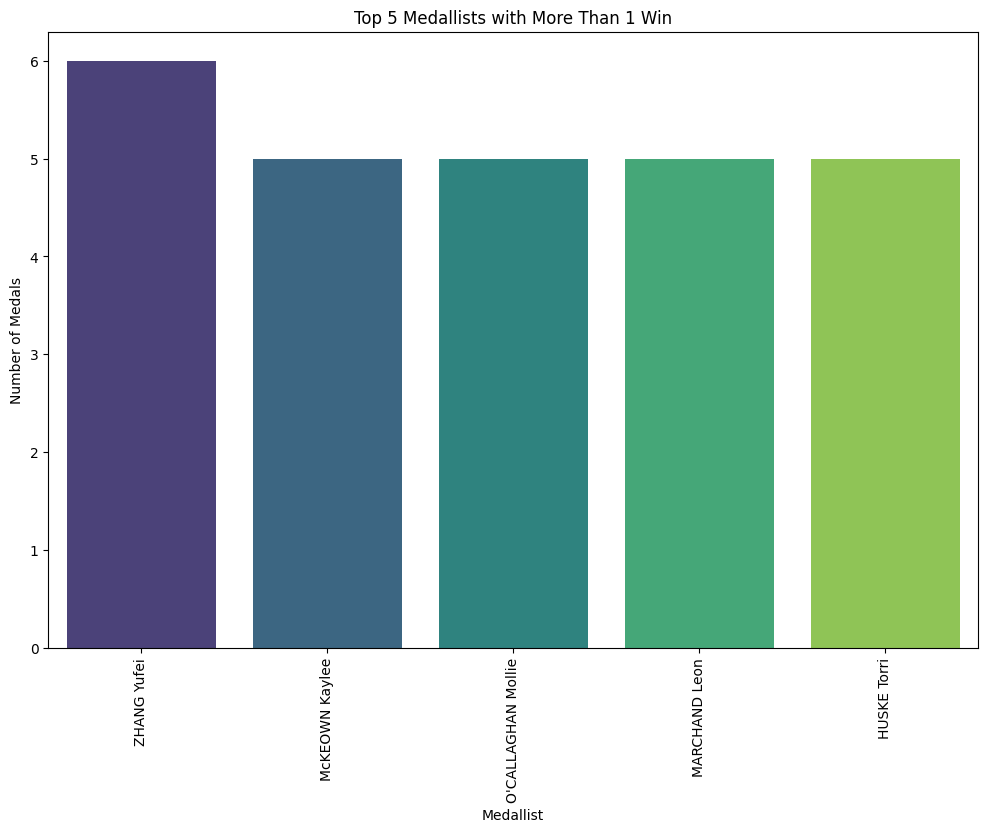

In [7]:
# Count the number of medals per medallist
medal_counts = medallist_df['name'].value_counts().reset_index()
medal_counts.columns = ['name', 'count']

# Filter medallists with more than 1 win
medal_counts_filtered = medal_counts[medal_counts['count'] > 1]

# Sort the data by the number of medals in descending order and select the top 5
top_5_medallists = medal_counts_filtered.sort_values(by='count', ascending=False).head(5)

# Plot vertical bar graph using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='count', data=top_5_medallists, palette='viridis')
plt.xlabel('Medallist')
plt.ylabel('Number of Medals')
plt.title('Top 5 Medallists with More Than 1 Win')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

In [ ]:
medals_df.sample(10)

,medal_type,medal_code,medal_date,name,country_code,gender,discipline,event,event_type,url_event,code
225,Bronze Medal,3,2024-07-31,Isabel GOSE,GER,W,Swimming,Women's 1500m Freestyle,ATH,/en/paris-2024/results/swimming/women-s-1500m-...,1907171
1,Silver Medal,2,2024-07-27,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520
538,Bronze Medal,3,2024-08-05,Sifan HASSAN,NED,W,Athletics,Women's 5000m,ATH,/en/paris-2024/results/athletics/women-s-5000m...,1972105
43,Bronze Medal,3,2024-07-28,Mexico,MEX,W,Archery,Women's Team,HTEAM,/en/paris-2024/results/archery/women-s-team/fn...,ARCWTEAM3---MEX01
401,Bronze Medal,3,2024-08-03,United States,USA,M,Rowing,Men's Eight,TEAM,/en/paris-2024/results/rowing/men-s-eight/fnl-...,ROWMCOXED8--USA01
551,Silver Medal,2,2024-08-05,Joseph CLARKE,GBR,M,Canoe Slalom,Men's Kayak Cross,ATH,/en/paris-2024/results/canoe-slalom/men-s-kaya...,1896032
217,Gold Medal,1,2024-07-31,Leon MARCHAND,FRA,M,Swimming,Men's 200m Butterfly,ATH,/en/paris-2024/results/swimming/men-s-200m-but...,1909294
544,Bronze Medal,3,2024-08-05,Sandra ELKASEVIC,CRO,W,Athletics,Women's Discus Throw,ATH,/en/paris-2024/results/athletics/women-s-discu...,1922205
423,Gold Medal,1,2024-08-03,Kristof MILAK,HUN,M,Swimming,Men's 100m Butterfly,ATH,/en/paris-2024/results/swimming/men-s-100m-but...,1905860
687,Gold Medal,1,2024-08-07,Sarah Ann HILDEBRANDT,USA,W,Wrestling,Women's Freestyle 50kg,HATH,/en/paris-2024/results/wrestling/women-s-frees...,1955373


In [ ]:
country_df

,country_code,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,27,35,32,94
1,CHN,25,23,17,65
2,AUS,18,12,11,41
3,FRA,13,17,21,51
4,GBR,12,17,20,49
...,...,...,...,...,...
75,GRN,0,0,1,1
76,PER,0,0,1,1
77,POR,0,0,1,1
78,SVK,0,0,1,1


In [10]:
# Calculate the percentage of total medals for each country
total_medals = country_df['Total'].sum()
country_df['Percentage'] = (country_df['Total'] / total_medals) * 100

# Separate countries with less than 2% of total medals
rest_of_world = country_df[country_df['Percentage'] < 2].copy()
main_countries = country_df[country_df['Percentage'] >= 2].copy()

# Aggregate the rest of the world data
rest_of_world_row = pd.DataFrame({
    'country_code': ['Rest of the World'],
    'Gold Medal': [rest_of_world['Gold Medal'].sum()],
    'Silver Medal': [rest_of_world['Silver Medal'].sum()],
    'Bronze Medal': [rest_of_world['Bronze Medal'].sum()],
    'Total': [rest_of_world['Total'].sum()],
    'Percentage': [rest_of_world['Percentage'].sum()]
})

# Combine the dataframes
final_df = pd.concat([main_countries, rest_of_world_row], ignore_index=True)

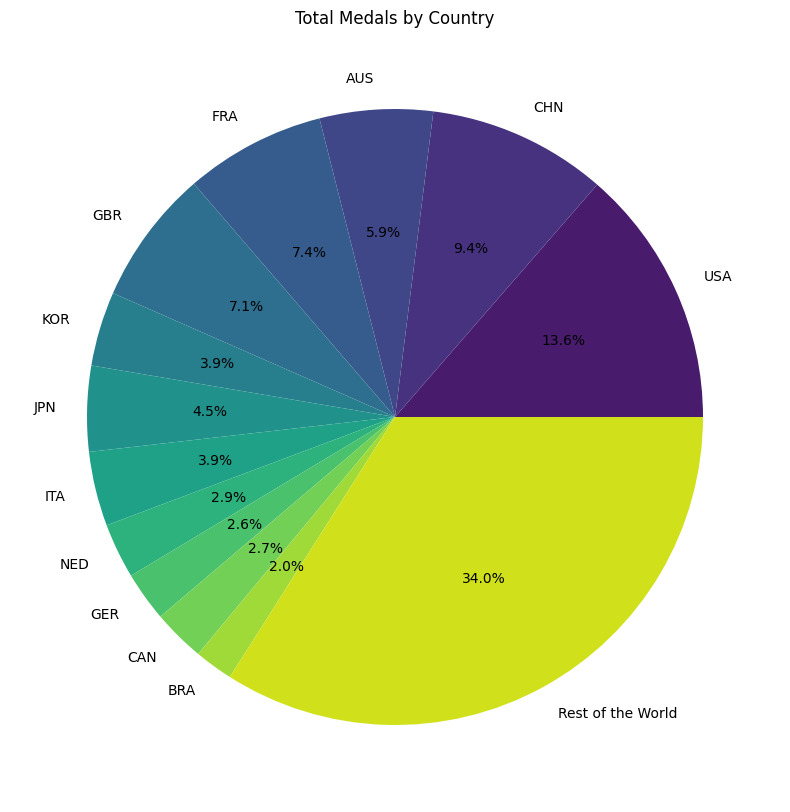

In [11]:
# Define a color palette from Seaborn
colors = sns.color_palette("viridis", n_colors=len(final_df))

# Plot pie chart using Matplotlib with Seaborn colors
plt.figure(figsize=(12, 10))
plt.pie(final_df['Total'], labels=final_df['country_code'], autopct='%1.1f%%', colors=colors)
plt.title('Total Medals by Country')
plt.show()

<ipython-input-8-f5f210795631>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='country_code', data=top_5_countries, palette=colors)


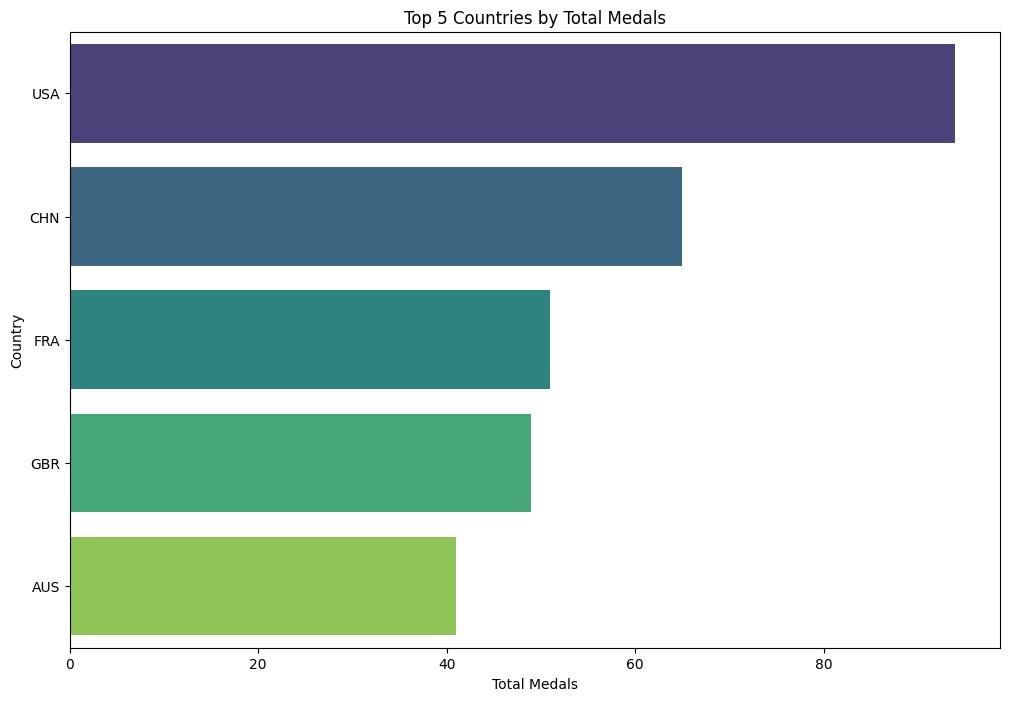

In [8]:
# Sort by the 'Total' column in descending order and select the top 5
top_5_countries = country_df.sort_values(by='Total', ascending=False).head(5)

# Define a list of colors for the bars
colors = sns.color_palette("viridis", n_colors=len(top_5_countries))

# Plot horizontal bar graph using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Total', y='country_code', data=top_5_countries, palette=colors)
plt.xlabel('Total Medals')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Medals')
plt.show()

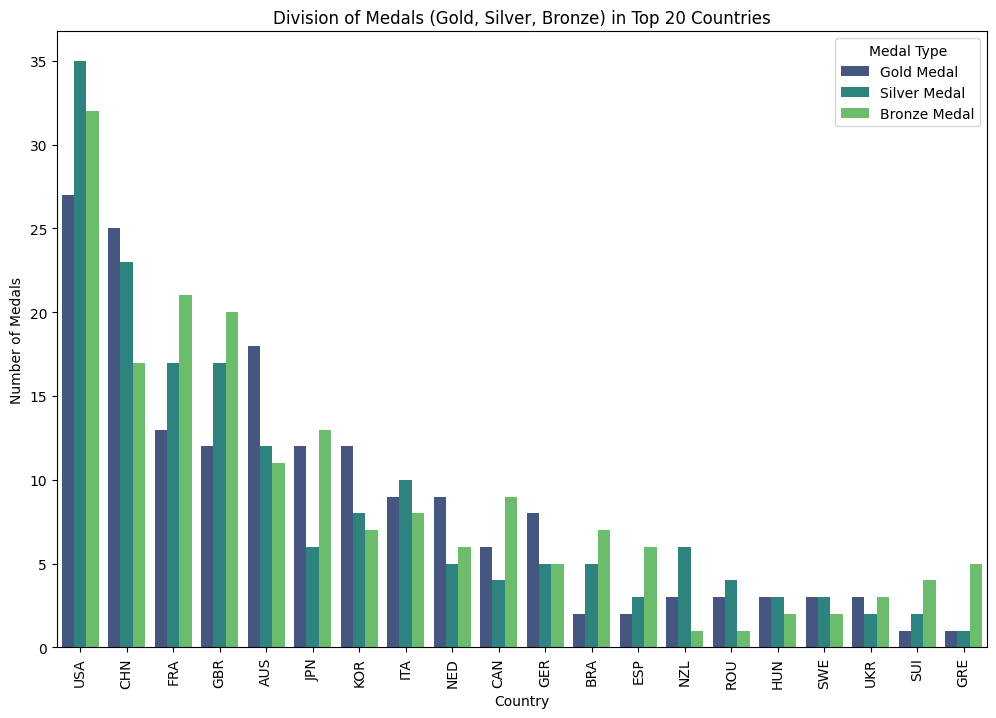

In [14]:

top_20_countries = country_df.sort_values(by='Total', ascending=False).head(20)

# Melt the DataFrame to long format for easier plotting
top_20_countries_melted = pd.melt(top_20_countries,
                                  id_vars=['country_code'],
                                  value_vars=['Gold Medal', 'Silver Medal', 'Bronze Medal'],
                                  var_name='Medal Type',
                                  value_name='Count')

# Plot grouped bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='country_code', y='Count', hue='Medal Type', data=top_20_countries_melted, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Division of Medals (Gold, Silver, Bronze) in Top 20 Countries')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.legend(title='Medal Type')
plt.show()


In [19]:
import geopandas as gpd
import plotly.express as px
import pandas as pd

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))





# Merge the medal data with the world map data
world = world.merge(country_df, left_on='iso_a3', right_on='country_code', how='left')

world['Total'].fillna(0, inplace=True)

# Create a choropleth map using Plotly Express
fig = px.choropleth(world,
                    locations='iso_a3',
                    color='Total',
                    hover_name='name',
                    hover_data={'Total': True},  # Show number of medals in hover
                    color_continuous_scale='Viridis',
                    title='Total Olympic Medals by Country')

fig.show()


<ipython-input-19-24bedb23e300>:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [25]:

india_medals = medals_df[medals_df['country_code'] == 'IND']

# Display the names and dates of medals
print(india_medals[['medal_date', 'medal_type', 'name']])

# Optionally, you can sort the data by date for better readability
india_medals_sorted = india_medals.sort_values(by='medal_date')
print(india_medals_sorted[['medal_date', 'medal_type', 'name']])


     medal_date    medal_type            name
69   2024-07-28  Bronze Medal     Manu BHAKER
160  2024-07-30  Bronze Medal         India 1
269  2024-08-01  Bronze Medal  Swapnil KUSALE
     medal_date    medal_type            name
69   2024-07-28  Bronze Medal     Manu BHAKER
160  2024-07-30  Bronze Medal         India 1
269  2024-08-01  Bronze Medal  Swapnil KUSALE
